# UCI Machine Learning Repository - Prostate Cancer Data set
For this project we will be working with the UCI Repository Prostate Cancer Data Set. This is a very famous data set and quite many papers have been published on the same!

We'll be trying to predict a classification- Diagnosis is Malignant 'M' or benign 'B'. Let's begin our understanding of implementing K-Nearest Neighbour in Python for classification.

We'll use the raw version of the data set (the one provided), and perform some categorical variables encoding (dummy variables) in python for quite many features if required.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data - Loading & Cleaning

Let's start by reading in the adult.csv file into a pandas dataframe. Cleaning the data, if required.

In [4]:
df = pd.read_csv('Prostate_Cancer.csv')

In [5]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
df.drop('id', axis=1, inplace=True)

## Exploratory Data Analysis
Performing some exploratory data analysis for better knowing the data set

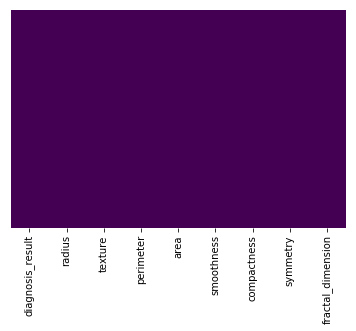

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

#### From the above heatmap, Looks like there is no missing data in the data set

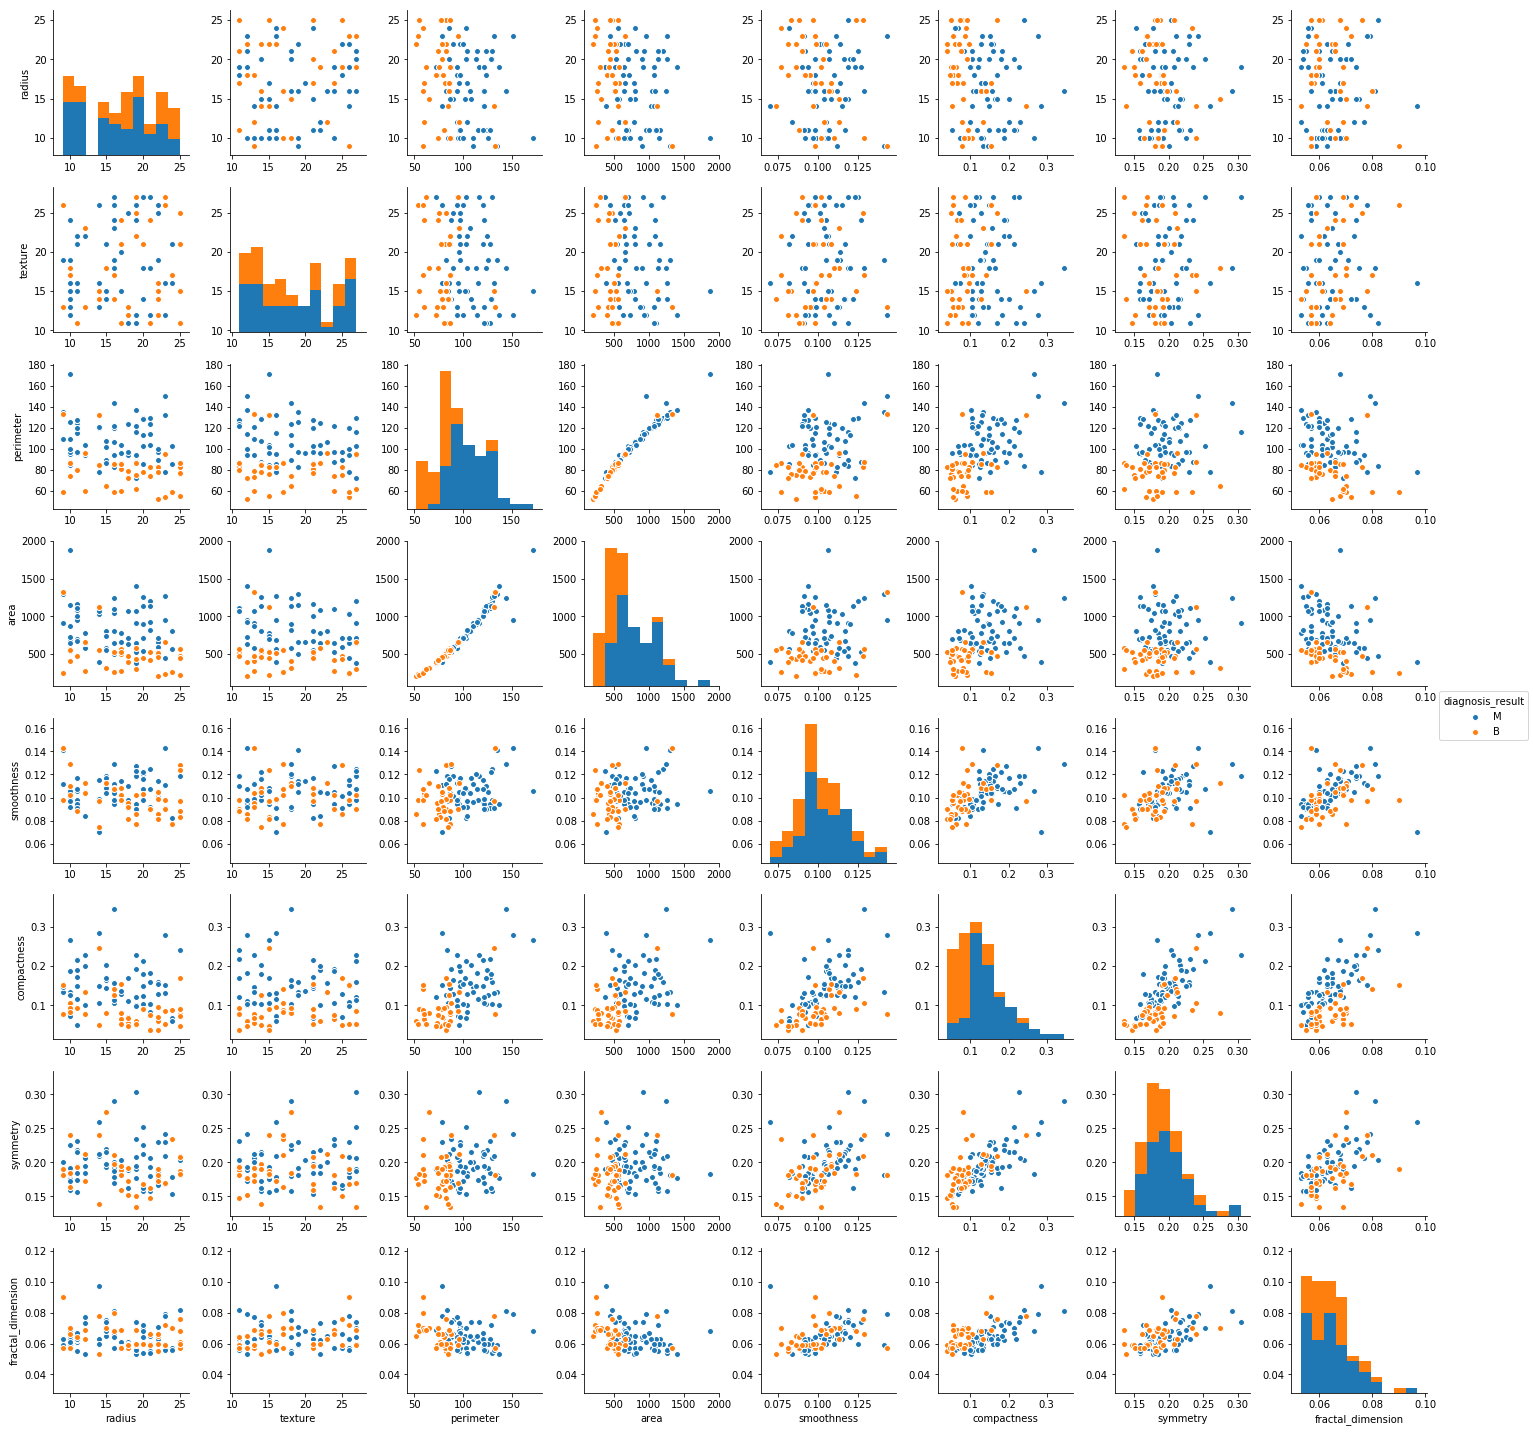

In [8]:
sns.pairplot(df, hue='diagnosis_result')

In [9]:
df.columns

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.1+ KB


## Feature Scaling
Normalising the features using Scikit Learn Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('diagnosis_result', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_feature = scaler.transform(df.drop('diagnosis_result', axis=1))

In [15]:
df_feature = pd.DataFrame(scaled_feature, columns=df.columns[1:])

In [16]:
df_feature.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


## Training & Test Data
Creating the Training & Test Data from the Data Set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, df['diagnosis_result'], test_size=0.3, random_state=101)

## Initializing, Training & Testing Model
Now inititaling the model, then traning with the training data set and testing with the test data set

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

## Evaluating the Model
Now once the model has been trained and tested, we will evaluate the model using the metrics

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          B       0.53      0.62      0.57        13
          M       0.67      0.59      0.62        17

avg / total       0.61      0.60      0.60        30



[[ 8  5]
 [ 7 10]]


## Finding the best probable value of 'K' - Elbow Method
Using the elbow method to find the best probable value of 'K' for which the error is least

In [24]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now we have got an array 'error_rate' that contains the mean of errors for every iteration of 'K' from 1 to 30. We will use this to get the value of 'K' for which the error rate is lowest. Let's plot this information on graph so that it's easy to interpret the same.

Text(0,0.5,'Error Rate')

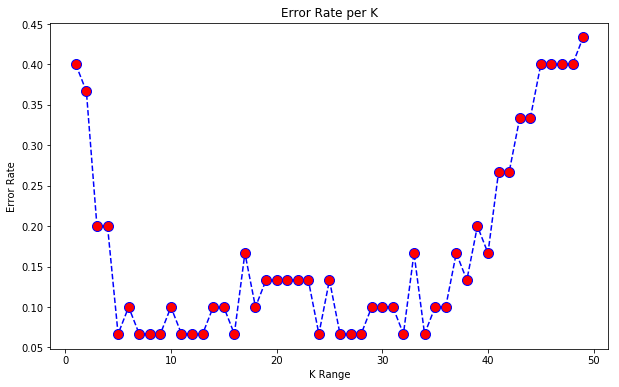

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 50), error_rate, linestyle='--', color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate per K')
plt.xlabel('K Range')
plt.ylabel('Error Rate')

## For K = 11 or K=12
From the above plot, it is evident that the error rate goes down as we increase the 'K' value till k=27 or 28. We may further calculate the K values, but the looks like after that the error rate usually remains constant.

You may try with larger K values if you wish.

NOTE: If you find the below value of 'K' not equal to 11 or 12, then i would have been experimenting with the values of 'K' to get the optimal result. But anyway, you get the essene right !

Hence now training and fitting the model for K=6 and evaluating the model

In [29]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          B       1.00      0.85      0.92        13
          M       0.89      1.00      0.94        17

avg / total       0.94      0.93      0.93        30



[[11  2]
 [ 0 17]]


#### Hence our KNN Model is 94% accurate. That's quite an accuacy !!